In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error
from collections import Counter

In [4]:
# Load the dataset
spam_data = pd.read_csv('spam.csv')
print(spam_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [6]:
# Convert 'spam' and 'ham' to binary labels
spam_data['spam'] = spam_data['Category'].map({'spam': 1, 'ham': 0})
print(spam_data)

     Category                                            Message  label  spam
0         ham  Go until jurong point, crazy.. Available only ...      0     0
1         ham                      Ok lar... Joking wif u oni...      0     0
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...      1     1
3         ham  U dun say so early hor... U c already then say...      0     0
4         ham  Nah I don't think he goes to usf, he lives aro...      0     0
...       ...                                                ...    ...   ...
5567     spam  This is the 2nd time we have tried 2 contact u...      1     1
5568      ham               Will ü b going to esplanade fr home?      0     0
5569      ham  Pity, * was in mood for that. So...any other s...      0     0
5570      ham  The guy did some bitching but I acted like i'd...      0     0
5571      ham                         Rofl. Its true to its name      0     0

[5572 rows x 4 columns]


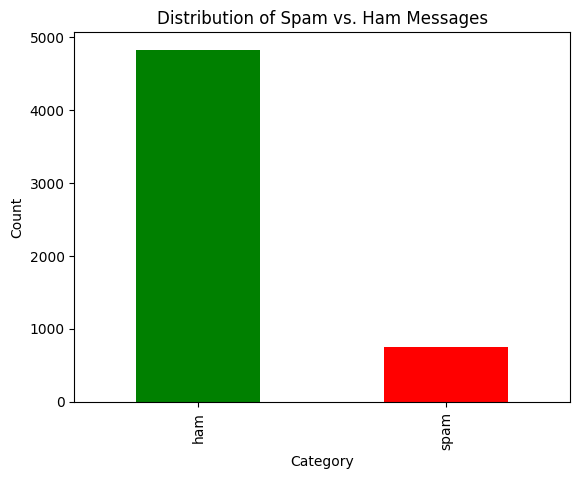

<Figure size 640x480 with 0 Axes>

In [21]:
# Visualize the distribution of spam vs. ham messages
spam_data['Category'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [8]:
# Identify the most frequent words in both spam and ham messages
spam_words = ' '.join(spam_data[spam_data['Category'] == 'spam']['Message'])
ham_words = ' '.join(spam_data[spam_data['Category'] == 'ham']['Message'])
spam_word_count = Counter(spam_words.split()).most_common(10)
ham_word_count = Counter(ham_words.split()).most_common(10)

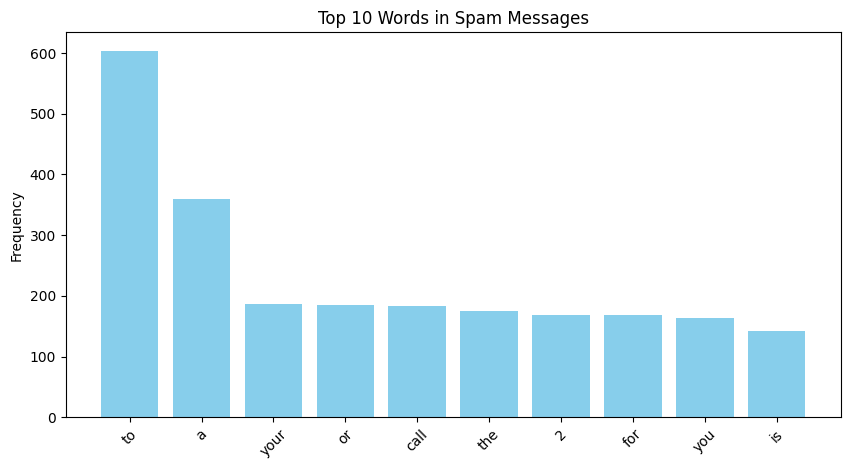

<Figure size 640x480 with 0 Axes>

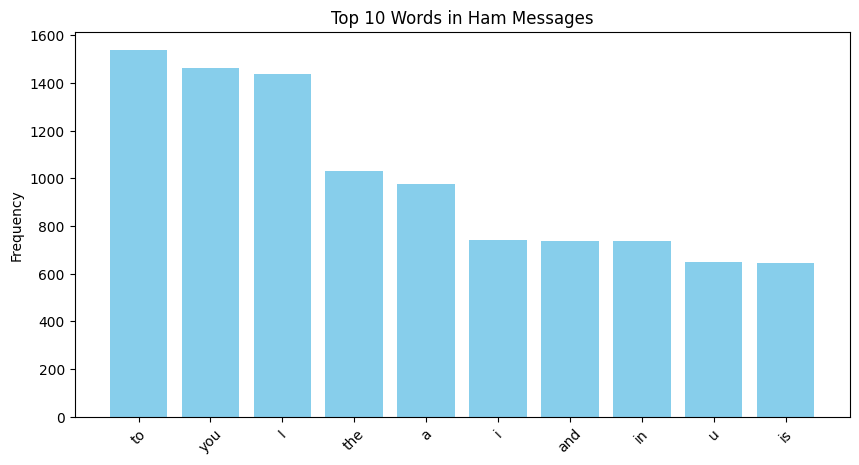

<Figure size 640x480 with 0 Axes>

In [22]:
# Plotting top words for spam and ham
def plot_top_words(word_count, title):
    words, counts = zip(*word_count)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()

plot_top_words(spam_word_count, 'Top 10 Words in Spam Messages')
plot_top_words(ham_word_count, 'Top 10 Words in Ham Messages')


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spam_data['Message'], spam_data['label'], test_size=0.2, random_state=42)

In [11]:
# Convert text data into a matrix of token counts using CountVectorizer
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [12]:
# Train the Multinomial Naive Bayes model
mnb_model = MultinomialNB()
mnb_model.fit(X_train_transformed, y_train)
mnb_predictions = mnb_model.predict(X_test_transformed)

In [13]:
# Evaluate the Multinomial Naive Bayes model
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
mnb_mae = mean_absolute_error(y_test, mnb_predictions)
mnb_mse = mean_squared_error(y_test, mnb_predictions)
mnb_rmse = np.sqrt(mnb_mse)

In [14]:
# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_transformed, y_train)
lr_predictions = lr_model.predict(X_test_transformed)

In [15]:
# Evaluate the Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)

In [20]:
# Print the results
print("Multinomial Naive Bayes Results:")
print(f"Accuracy: {mnb_accuracy*100:.2f}")
print(f"MAE: {mnb_mae:.4f}")
print(f"MSE: {mnb_mse:.4f}")
print(f"RMSE: {mnb_rmse:.4f}")

print("\nLogistic Regression Results:")
print(f"Accuracy: {lr_accuracy*100:.2f}")
print(f"MAE: {lr_mae:.4f}")
print(f"MSE: {lr_mse:.4f}")
print(f"RMSE: {lr_rmse:.4f}")

Multinomial Naive Bayes Results:
Accuracy: 99.19
MAE: 0.0081
MSE: 0.0081
RMSE: 0.0898

Logistic Regression Results:
Accuracy: 98.65
MAE: 0.0135
MSE: 0.0135
RMSE: 0.1160
